# Statistics using Scikit-image

We can use scikit-image for extracting features from label images. For convenience reasons we use the [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops) library. 

Before we can do measurements, we need an `image` and a corresponding `label_image`. Therefore, we recapitulate filtering, thresholding and labeling:

In [1]:
from skimage.io import imread
from skimage import filters
from skimage import measure
from napari_skimage_regionprops import regionprops_table
import pandas as pd 
import numpy as np
import stackview

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
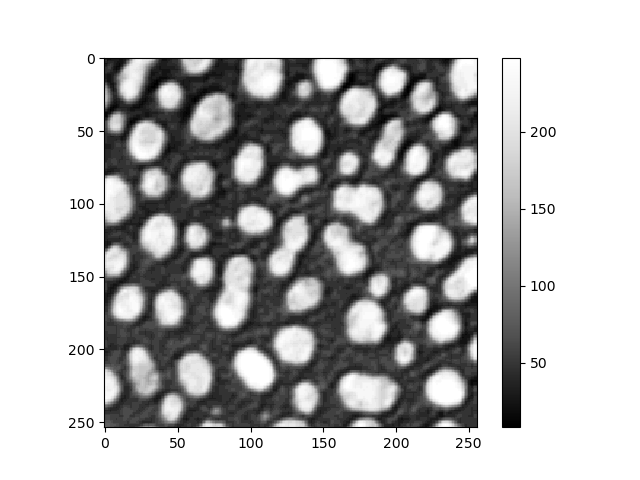
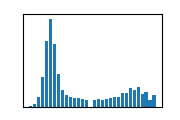

In [2]:
# load image
image = imread("data/blobs.tif")

stackview.insight(image)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
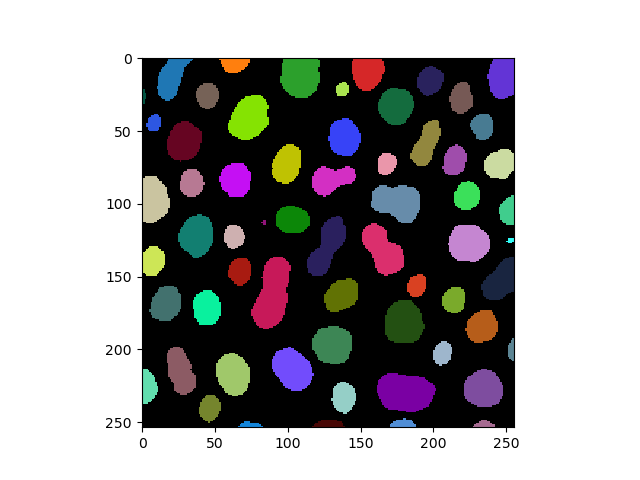

In [3]:
# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
stackview.insight(label_image)

## Measurements / region properties

We are now using the very handy function `regionprops_table`. It provides features based on the scikit-image [regionprops list of measurements](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) library. Let us check first what we need to provide for this function:

In [4]:
regionprops_table?

Signature:
regionprops_table(
    image: 'napari.types.ImageData',
    labels: 'napari.types.LabelsData',
    size: bool = True,
    intensity: bool = True,
    perimeter: bool = False,
    shape: bool = False,
    position: bool = False,
    moments: bool = False,
    napari_viewer: 'napari.Viewer' = None,
) -> 'pandas.DataFrame'
Docstring: Adds a table widget to a given napari viewer with quantitative analysis results derived from an image-label pair.
File:      c:\users\haase\mambaforge\envs\tea2024\lib\site-packages\napari_skimage_regionprops\_regionprops.py
Type:      function

In [5]:
df = pd.DataFrame(regionprops_table(image , label_image, 
                                           perimeter = True, 
                                           shape = True, 
                                           position=True))
df

label   area  bbox_area  equivalent_diameter  convex_area  max_intensity  \
0       1  429.0      750.0            23.371345        479.0          232.0   
1       2  183.0      231.0            15.264430        190.0          224.0   
2       3  658.0      756.0            28.944630        673.0          248.0   
3       4  433.0      529.0            23.480049        445.0          248.0   
4       5  472.0      551.0            24.514670        486.0          248.0   
..    ...    ...        ...                  ...          ...            ...   
57     58  213.0      285.0            16.468152        221.0          224.0   
58     59   79.0      108.0            10.029253         84.0          248.0   
59     60   88.0      110.0            10.585135         92.0          216.0   
60     61   52.0       75.0             8.136858         56.0          248.0   
61     62   48.0       68.0             7.817640         53.0          224.0   

    mean_intensity  min_intensity  perimeter  perimeter_crofton  ...  bbox-0  \
0       191.440559          128.0  89.012193          87.070368  ...       0   
1       179.846995          128.0  53.556349          53.456120  ...       0   
2       205.604863          120.0  95.698485          93.409370  ...       0   
3       217.515012          120.0  77.455844          76.114262  ...       0   
4       213.033898          128.0  83.798990          82.127941  ...       0   
..             ...            ...        ...                ...  ...     ...   
57      184.525822          120.0  52.284271          52.250114  ...     232   
58      184.810127          128.0  39.313708          39.953250  ...     248   
59      182.727273          128.0  45.692388          46.196967  ...     249   
60      189.538462          128.0  30.692388          32.924135  ...     249   
61      173.833333          128.0  33.071068          35.375614  ...     250   

    bbox-1  bbox-2  bbox-3  weighted_centroid-0  weighted_centroid-1  \
0       10      30      35            13.130723            19.987532   
1       53      11      74             4.156053            63.178901   
2       95      28     122            12.485897           108.430312   
3      144      23     167             9.630850           154.408732   
4      237      29     256            13.051158           247.170738   
..     ...     ...     ...                  ...                  ...   
57      39     251      54           240.563200            46.034602   
58     170     254     188           251.276164           178.373151   
59     117     254     139           251.403483           127.717413   
60     227     254     242           251.671266           234.202922   
61      66     254      83           252.038351            73.570470   

    standard_deviation_intensity  aspect_ratio  roundness  circularity  
0                      29.793138      2.088249   0.451572     0.680406  
1                      21.270534      1.782168   0.530849     0.801750  
2                      29.392255      1.067734   0.918683     0.902871  
3                      35.852345      1.061942   0.917813     0.906963  
4                      28.741080      1.579415   0.621952     0.844645  
..                           ...           ...        ...          ...  
57                     28.255467      1.296143   0.771094     0.979146  
58                     33.739912      3.173540   0.300766     0.642316  
59                     24.417173      4.021193   0.238521     0.529669  
60                     37.867411      2.839825   0.322190     0.693668  
61                     27.987596      4.417297   0.213334     0.551512  

[62 rows x 31 columns]

As you can see, we have now plenty of features to investigate. We can print out all feature names with the `keys` function:

In [6]:
print(df.keys())

Index(['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area',
       'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter',
       'perimeter_crofton', 'extent', 'local_centroid-0', 'local_centroid-1',
       'solidity', 'feret_diameter_max', 'major_axis_length',
       'minor_axis_length', 'orientation', 'eccentricity', 'centroid-0',
       'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3',
       'weighted_centroid-0', 'weighted_centroid-1',
       'standard_deviation_intensity', 'aspect_ratio', 'roundness',
       'circularity'],
      dtype='object')


We can select some columns that we want to focus on like this:

In [7]:
df_selection = df[['label', 'area', 'extent', 'aspect_ratio', 'roundness', 'circularity']]
df_selection

label   area    extent  aspect_ratio  roundness  circularity
0       1  429.0  0.572000      2.088249   0.451572     0.680406
1       2  183.0  0.792208      1.782168   0.530849     0.801750
2       3  658.0  0.870370      1.067734   0.918683     0.902871
3       4  433.0  0.818526      1.061942   0.917813     0.906963
4       5  472.0  0.856624      1.579415   0.621952     0.844645
..    ...    ...       ...           ...        ...          ...
57     58  213.0  0.747368      1.296143   0.771094     0.979146
58     59   79.0  0.731481      3.173540   0.300766     0.642316
59     60   88.0  0.800000      4.021193   0.238521     0.529669
60     61   52.0  0.693333      2.839825   0.322190     0.693668
61     62   48.0  0.705882      4.417297   0.213334     0.551512

[62 rows x 6 columns]

And `describe` gives us basic statistics like `max`, `mean`, `min` and `std` of each feature:

In [8]:
df_selection.describe()

label        area     extent  aspect_ratio  roundness  circularity
count  62.000000   62.000000  62.000000     62.000000  62.000000    62.000000
mean   31.500000  355.370968   0.761363      1.637991   0.692418     0.894101
std    18.041619  211.367385   0.065208      0.794366   0.210973     0.183024
min     1.000000    7.000000   0.541102      1.048053   0.213334     0.529669
25%    16.250000  194.750000   0.744329      1.168451   0.538616     0.805774
50%    31.500000  366.000000   0.781076      1.316003   0.757485     0.925560
75%    46.750000  500.750000   0.799519      1.769976   0.851463     0.966037
max    62.000000  896.000000   0.870370      4.417297   0.974824     1.886542

If we're interested in specific descriptive statistics, we can derive them directly from the columns.

In [9]:
df_selection['area'].mean()

355.3709677419355

## Exercises

Make a table with only `area`, `mean_intensity`, `standard_deviation_intensity` and `label`.

How many object are in the dataframe?

How large is the largest object?

What is the mean intensity of the brightest object?

What are mean and standard deviation intensity of the image?